In [51]:
import pandas as pd

sample_df = pd.read_csv('/content/sample_50000.csv')

In [52]:
sample_df.head()

,level_0,index,drugName,condition,review,rating,date,usefulCount,processed_review,sentiment
0,147774,160342,Buspirone,Anxiety,"""Have had some anxiety for the second time in ...",1.0,"October 2, 2016",6,anxieti second time life first time well xan...,negative
1,90307,97984,Nexplanon,Birth Control,"""My implant was inserted in July 2014 and for ...",5.0,"September 10, 2015",2,implant insert juli 2014 first six month spo...,neutral
2,193758,210384,Linzess,Constipation,"""A nurse practitioner gave me samples. I took ...",1.0,"July 13, 2014",54,nurs practition gave sampl took one pill cl...,negative
3,112907,122447,Linaclotide,"Constipation, Chronic","""I&#039;m a 45 yr old woman who has had IBS wi...",9.0,"July 2, 2017",13,45 yr old woman ib chronic constip year de...,positive
4,89225,96812,Ambien,10</span> users found this comment helpful.,"""Yes it works real good im addicted to it. I h...",9.0,"November 20, 2016",10,ye work real good im addict take last 4 year...,positive


In [11]:
!pip install nltk

Write one very positive sentence

Write one very negative sentence

Stemmatize and lemmatize them

Tokenize the processed reviews

If you need to, tokenize the positive and negative sentences

Sanity check: choose a random review from the samples dataset and compute the differences of similarities

Modeing: Do this for all the reviews. Check [notebook](https://github.com/elhamod/BA820/blob/main/Hands-on/04-text-mining/Sentiment_analysis.ipynb).

In [53]:
import nltk
nltk.download('punkt')

from nltk.corpus import stopwords
nltk.download('stopwords')
#creating a set of English stopwords from NLTK
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [54]:
def process_text(text):
    words = nltk.word_tokenize(text) #Tokenizing the input text into words
    filtered_words = [word for word in words if word.lower() not in stop_words] #filtering out stopwords from the tokenized words
    return ' '.join(filtered_words) #joining the filtered words back into a single string

sample_df['spacy_review'] = sample_df['review'].apply(process_text)

In [55]:
sample_df['spacy_review'] = sample_df['spacy_review'].str.replace('& # 039 ;', '')

In [56]:
sample_df['spacy_review'] = sample_df['spacy_review'].str.lower()

In [57]:
import string
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)#creating a translation table to remove punctuation
    return text.translate(translator)

In [58]:
sample_df['spacy_review'] = sample_df['spacy_review'].apply(remove_punctuation)

In [29]:
!pip install gensim

In [30]:
from gensim import downloader

# load the GloVe model
glove_model = downloader.load("glove-wiki-gigaword-300")

[==================================================] 100.0% 376.1/376.1MB downloaded


In [34]:
!pip install spacy

In [35]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 20.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [59]:
import spacy
nlp = spacy.load("en_core_web_sm")

def get_tokens(doc):
    doc_tokenized = nlp(doc)
    tokens = [token.text for token in doc_tokenized]
    return tokens

In [60]:
sample_df['spacy_tokens'] = sample_df['spacy_review'].apply(get_tokens)

In [61]:
sample_df.head()

,level_0,index,drugName,condition,review,rating,date,usefulCount,processed_review,sentiment,spacy_review,spacy_tokens
0,147774,160342,Buspirone,Anxiety,"""Have had some anxiety for the second time in ...",1.0,"October 2, 2016",6,anxieti second time life first time well xan...,negative,anxiety second time life first time well xan...,"[ , anxiety, second, time, life, , first, tim..."
1,90307,97984,Nexplanon,Birth Control,"""My implant was inserted in July 2014 and for ...",5.0,"September 10, 2015",2,implant insert juli 2014 first six month spo...,neutral,implant inserted july 2014 first six months ...,"[ , implant, inserted, july, 2014, first, six,..."
2,193758,210384,Linzess,Constipation,"""A nurse practitioner gave me samples. I took ...",1.0,"July 13, 2014",54,nurs practition gave sampl took one pill cl...,negative,nurse practitioner gave samples took one pil...,"[ , nurse, practitioner, gave, samples, , too..."
3,112907,122447,Linaclotide,"Constipation, Chronic","""I&#039;m a 45 yr old woman who has had IBS wi...",9.0,"July 2, 2017",13,45 yr old woman ib chronic constip year de...,positive,45 yr old woman ibs chronic constipation yea...,"[ , 45, yr, old, woman, ibs, chronic, constip..."
4,89225,96812,Ambien,10</span> users found this comment helpful.,"""Yes it works real good im addicted to it. I h...",9.0,"November 20, 2016",10,ye work real good im addict take last 4 year...,positive,yes works real good im addicted taking last ...,"[ , yes, works, real, good, i, m, addicted, ,..."


In [62]:
sample_df.to_csv('spacy_tokens.tsv', index=False, sep="\t")

In [63]:
import numpy as np

def get_word_embedding(word, model):
    if word in model.key_to_index:
        return model[word]
    else:
        return np.zeros(model.vector_size)

In [64]:
embeddings = []
for review in sample_df['spacy_tokens']:
    sample_embeddings = [get_word_embedding(word, glove_model) for word in review]
    sample_embedding = np.mean(sample_embeddings if len(sample_embeddings) >0 else [np.zeros(glove_model.vector_size)], axis=0)
    embeddings = embeddings + [sample_embedding]

In [65]:
embeddings = np.array(embeddings)

In [66]:
embeddings

array([[-4.06890868e-02,  2.80631225e-02, -1.63758178e-02, ...,
        -8.75764357e-02, -1.67611310e-03,  2.39304052e-02],
       [-9.62281405e-02,  8.72025088e-02, -6.35394480e-03, ...,
        -1.67532509e-01, -1.04482466e-01, -4.53861606e-02],
       [-7.09612182e-02,  6.37495305e-02, -4.20494546e-02, ...,
        -3.81647385e-02, -8.35460762e-02,  1.13094026e-01],
       ...,
       [-4.51899660e-02,  1.48588284e-01,  6.34105710e-02, ...,
         5.55472936e-05,  6.31569408e-03, -1.02526829e-01],
       [-8.21554630e-02,  1.29523789e-01,  9.67955708e-02, ...,
        -1.36522825e-01, -7.94999277e-02, -8.72033187e-02],
       [ 2.92238167e-02,  7.08149234e-02,  2.13342421e-02, ...,
        -3.89718862e-02,  1.66054747e-02, -3.94281536e-02]])

In [67]:
embeddings.shape

(50000, 300)

In [77]:
ideal_pos = ["life-saving", "revolutionary", "very effective", "brilliant", "remarkable", "phenomenal", "life-altering", "exceptionally well-tolerated", "exceptional efficacy", "astounding", "excellent", "wonderful", "unbelievable", "superb", "marvelous", "amazingly effective", "highly recommended", "outstanding", "incredible", "game-changing"]

ideal_neg = ["crippling side effects", "absolutely dreadful", "not recommended","complete disaster", "intolerable", "horrendous", "absolutely unbearable", "utterly ineffective", "completely unsatisfactory", "excruciatingly painful", "absolutely abysmal", "horrible", "atrocious", "dreadful experience", "unbearably bad", "disastrous", "unacceptable", "disappointing", "miserable", "agonizing", "worst"]


In [78]:
import nltk
nltk.download('wordnet')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Stemming and lemmatizing for ideal_pos
ideal_pos_stemmed = [stemmer.stem(word) for word in ideal_pos]
ideal_pos_lemmatized = [lemmatizer.lemmatize(word) for word in ideal_pos]

# Stemming and lemmatizing for ideal_neg
ideal_neg_stemmed = [stemmer.stem(word) for word in ideal_neg]
ideal_neg_lemmatized = [lemmatizer.lemmatize(word) for word in ideal_neg]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [79]:
from nltk.tokenize import word_tokenize

test = word_tokenize('This is a really good medicine. I loved it. Very effective. Highly reccomend.')

In [80]:
glove_model.n_similarity(test, ideal_pos_stemmed)

0.26514298

In [81]:
glove_model.n_similarity(test, ideal_neg_stemmed)

-0.051849317

In [91]:
test2 = ('horrible experience. very painful and completely ineffective. worst experience.')

In [92]:
glove_model.n_similarity(test2, ideal_pos_stemmed)

0.054697707

In [93]:
glove_model.n_similarity(test2, ideal_neg_stemmed)

-0.075467005

In [107]:
sample_df['sentiment'] = sample_df['sentiment'].map({'negative': 0, 'neutral': 1, 'positive': 2})

In [109]:
sample_df.dtypes

level_0               int64
index                 int64
drugName             object
condition            object
review               object
rating              float64
date                 object
usefulCount           int64
processed_review     object
sentiment             int64
spacy_review         object
spacy_tokens         object
dtype: object

In [112]:
sample_df['sentiment'] = sample_df['sentiment'].astype('category')
sample_df.dtypes

level_0                int64
index                  int64
drugName              object
condition             object
review                object
rating               float64
date                  object
usefulCount            int64
processed_review      object
sentiment           category
spacy_review          object
spacy_tokens          object
dtype: object

In [113]:
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

X = sample_df['spacy_tokens']
y = sample_df['sentiment']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [114]:
def sentiment(review):
  return glove_model.n_similarity(review, ideal_pos) - glove_model.n_similarity(review, ideal_neg)

<Axes: >

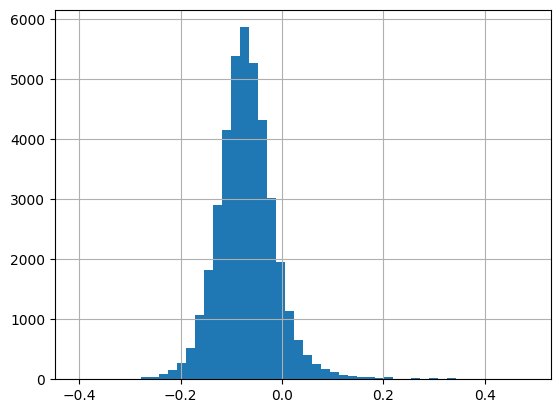

In [115]:
sentiment_score_train = X_train.apply(lambda x: sentiment(x))
sentiment_score_train.hist(bins=50)

In [116]:
train_mean = sentiment_score_train.mean()
train_mean

-0.06965367

In [149]:
positive_threshold = -0.08
negative_threshold = -0.1

# Function to assign sentiment class based on threshold
def assign_sentiment(score):
    if score > positive_threshold:
        return 2
    elif score < negative_threshold:
        return 0
    else:
        return 1

# Apply the function to assign sentiment classes
y_pred = X_test.apply(lambda x: assign_sentiment(sentiment(x)))

In [150]:
confusion_matrix(y_test, y_pred, normalize='true')

array([[0.49318182, 0.17136364, 0.33545455],
       [0.32406603, 0.18940052, 0.48653345],
       [0.21311475, 0.14423222, 0.64265303]])

In [151]:
from sklearn.metrics import balanced_accuracy_score
print(balanced_accuracy_score(y_test, y_pred))

0.4417451233328545


<Axes: >

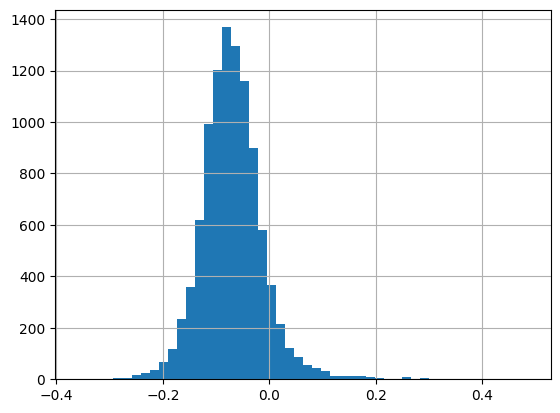

In [152]:
sentiment_score_test = X_test.apply(lambda x: sentiment(x))
sentiment_score_test.hist(bins=50)

In [153]:
sentiment_score_test.mean()

-0.06996926